# Linear Regression
#### Aprendizaje Supervisado
#### Cristina Gómez Alonso y Carlos Tessier

En estadística, **la regresión lineal es un enfoque lineal para modelar la relación entre una variable dependiente escalar y y una o más variables explicativas (o variables independientes) denominadas X**. El caso de una variable explicativa se denomina **regresión lineal simple o univariable**. Para más de una variable explicativa, el proceso se denomina **regresión lineal múltiple**.

Los modelos de regresión lineal a menudo se ajustan/entrenan utilizando la aproximación de mínimos cuadrados, pero también se pueden ajustar de otras maneras, como minimizando la "falta de ajuste" en alguna otra norma (como en la regresión de mínimas desviaciones absolutas), o minimizando una penalización de la función de pérdida por mínimos cuadrados como en la ridge regression y lasso.

Tener en cuenta, que la aproximación de mínimos cuadrados se puede utilizar para ajustar modelos que no sean modelos lineales. Así, aunque los términos “mínimos cuadrados” y “modelo lineal” están estrechamente vinculados, no son sinónimos.
En este notebook volveremos a utilizar el notebook de estimación de precios que vimos en el notebook de Exploratory Data Analysis. Tenéis todos los detalles en  la web de [kaggle](https://www.kaggle.com/camnugent/california-housing-prices)

Este conjunto de datos proviene del **censo de California de 1990** y contiene información resumida sobre las **viviendas** de varios distritos de California. Se utiliza como un conjunto de datos introductorio para el **aprendizaje automático** debido a su tamaño manejable y la necesidad de una limpieza de datos rudimentaria.

| Columna | Descripción Breve | Notas |
| :--- | :--- | :--- |
| **longitude** | Longitud geográfica del distrito. | |
| **latitude** | Latitud geográfica del distrito. | |
| **housing_median_age** | Mediana de la edad de las viviendas en el distrito. | |
| **total_rooms** | Número total de habitaciones en todas las viviendas del distrito. | |
| **total_bedrooms** | Número total de dormitorios en todas las viviendas del distrito. | |
| **population** | Población total del distrito. | |
| **households** | Número total de hogares en el distrito. | |
| **median_income** | Mediana de los ingresos de los hogares en el distrito. | Variable clave para la predicción. |
| **median_house_value** | Mediana del valor de las viviendas en el distrito. | La **variable objetivo** a predecir. |
| **ocean_proximity** | Proximidad de las viviendas al océano. | Variable categórica. |

---

### **Puntos Clave**

* **Contexto:** Censo de California de 1990.
* **Propósito:** Introducción a la implementación de algoritmos de **aprendizaje automático**, especialmente para la **predicción del valor de las viviendas**.
* **Estado de los Datos:** **No están limpios** y requieren pasos de preprocesamiento (ej. tratar valores faltantes o atípicos).
* **Fuente:** Capítulo 2 del libro *Hands-On Machine Learning with Scikit-Learn and TensorFlow* de Aurélien Géron.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 1. Importación de paquetes y dataset

El primer paso en cualquier proyecto de Machine Learning consiste en **importar las librerías necesarias**  
y **cargar el conjunto de datos** con el que vamos a trabajar.

En este caso utilizaremos el dataset **California Housing**, que contiene información sobre viviendas en diferentes distritos del estado de California.  
Cada fila representa una zona y contiene variables como el número medio de habitaciones, la edad media de las casas, el ingreso medio de la población o la proximidad al océano.

In [2]:
# Estas son las bibliotecas necesarias para la manipulación de datos en el ejercicio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los datos, fichero “housing.csv”
df = pd.read_csv("data/housing.csv")
df.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                  41          880           129.0   
1    -122.22     37.86                  21         7099          1106.0   
2    -122.24     37.85                  52         1467           190.0   
3    -122.25     37.85                  52         1274           235.0   
4    -122.25     37.85                  52         1627           280.0   

   population  households  median_income ocean_proximity  median_house_value  
0         322         126         8.3252        NEAR BAY              452600  
1        2401        1138         8.3014        NEAR BAY              358500  
2         496         177         7.2574        NEAR BAY              352100  
3         558         219         5.6431        NEAR BAY              341300  
4         565         259         3.8462        NEAR BAY              342200

## 2. EDA y Visual EDA

El **Análisis Exploratorio de Datos (EDA)** es una etapa fundamental antes de crear cualquier modelo.  
Nos permite **entender la estructura del dataset**, **detectar valores anómalos** y **comprobar relaciones entre variables**.

En esta sección realizaremos tanto un **EDA numérico** (con estadísticas y correlaciones)  
como un **EDA visual** (con histogramas, diagramas de dispersión y mapas de calor).

In [3]:
# Visualización preliminar de los datos. Mostrar las primeras filas del dataframe
df.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                  41          880           129.0   
1    -122.22     37.86                  21         7099          1106.0   
2    -122.24     37.85                  52         1467           190.0   
3    -122.25     37.85                  52         1274           235.0   
4    -122.25     37.85                  52         1627           280.0   

   population  households  median_income ocean_proximity  median_house_value  
0         322         126         8.3252        NEAR BAY              452600  
1        2401        1138         8.3014        NEAR BAY              358500  
2         496         177         7.2574        NEAR BAY              352100  
3         558         219         5.6431        NEAR BAY              341300  
4         565         259         3.8462        NEAR BAY              342200

In [4]:
# Comprobar la información del dataframe cargado
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [5]:
# Comprobar si existen valores nulos o faltan
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

### Primera aproximación estadística de los datos de que disponemos

 Visualiza los parámetros estadíscos tipo de cada columna del dataframe:
 - Número de datos
 - Madia
- Desviación estándar
 - Valor máximo
 - Valor mínimo
 - Percentiles

 Detección de posibles outliers

In [6]:

df.describe(percentiles=[0.1,0.25,0.5,0.75,0.9])

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
10%     -122.290000     33.630000           13.000000    941.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
90%     -117.250000     38.480000           46.000000   4651.500000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
10%        198.000000    510.000000    184.000000       1.903800   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
90%        965.000000   2566.000000    890.000000       6.159210   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
10%          82300.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
90%         376600.000000  
max         500001.000000

### Conclusión general del describe()

1. No hay errores graves ni valores fuera de rango lógico, pero:

    - Hay outliers fuertes en varias columnas.

    - Algunas variables (rooms, bedrooms, population) están en escalas muy diferentes → conviene normalizar o escalar.

2. Variables geográficas (longitude, latitude) pueden ser muy informativas, pero no lineales.
Una regresión lineal simple puede no capturar bien su efecto.

3. El valor objetivo (median_house_value) está truncado en 500 001, lo cual limitará el ajuste.

### Mostrar gráficamente los outliers

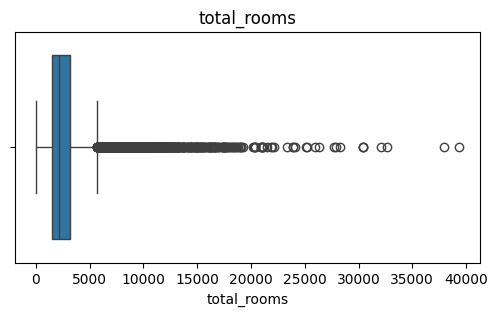

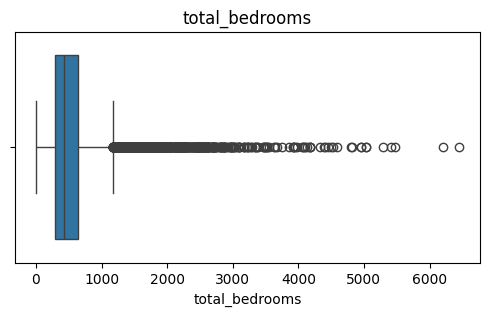

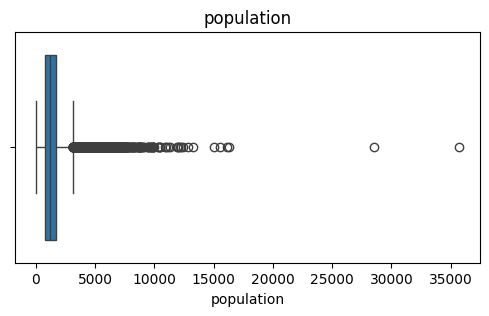

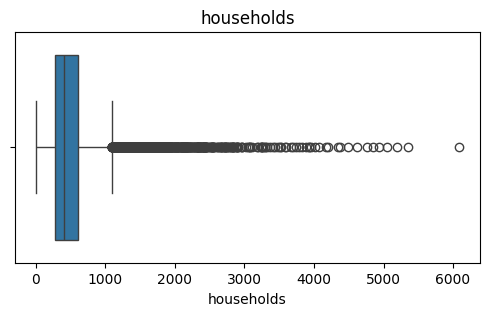

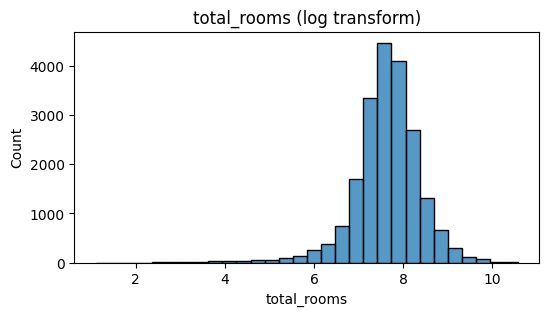

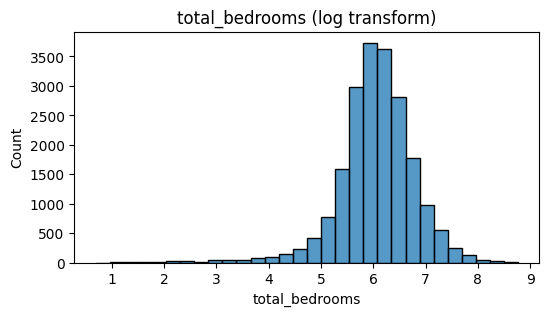

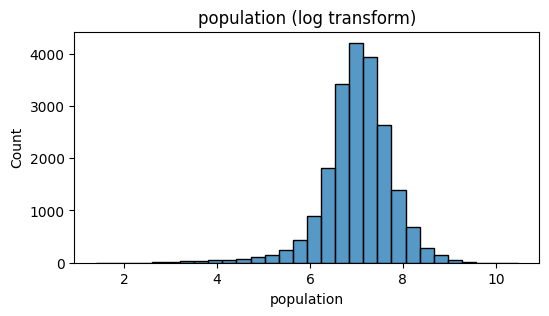

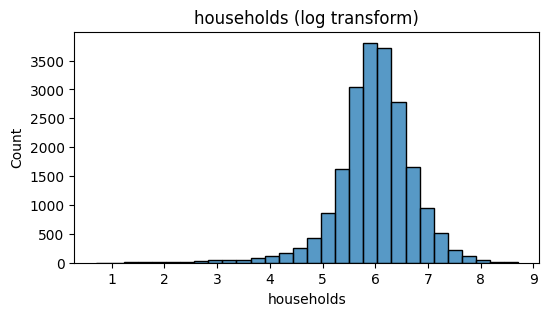

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

cols = ["total_rooms", "total_bedrooms", "population", "households"]

for col in cols:
    plt.figure(figsize=(6,3))
    sns.boxplot(x=df[col])
    plt.title(col)
    plt.show()

# o también mirar distribuciones logarítmicas
for col in cols:
    plt.figure(figsize=(6,3))
    sns.histplot(np.log1p(df[col]), bins=30)
    plt.title(f"{col} (log transform)")
    plt.show()


###  Qué hacer con los outliers

Tienes tres enfoques posibles, según el objetivo del análisis:

1. Tratar los outliers con capado (clipping) Sencillo y seguro si no quieres perder datos.

```python
for col in ["total_rooms", "total_bedrooms", "population", "households"]:
    q_low = df[col].quantile(0.01)
    q_high = df[col].quantile(0.99)
    df[col] = df[col].clip(q_low, q_high)
```

- Sustituye valores extremos por los percentiles 1% y 99%.
- Mantienes todas las filas.
- Evitas que esos valores distorsionen la regresión.

👉 Recomendado para aprendizaje automático general.

2. Eliminar filas con valores extremos

Más radical, pero a veces útil si son muy pocos:

```python
for col in ["total_rooms", "total_bedrooms", "population", "households"]:
    q_low = df[col].quantile(0.01)
    q_high = df[col].quantile(0.99)
    df = df[(df[col] >= q_low) & (df[col] <= q_high)]
```
3. Aplicar transformaciones logarítmicas

Transforma la variable para reducir la asimetría:

```python
import numpy as np

df["total_rooms_log"] = np.log1p(df["total_rooms"])  # log(1+x)
df["total_bedrooms_log"] = np.log1p(df["total_bedrooms"])
df["population_log"] = np.log1p(df["population"])
```

- Suaviza las colas largas.

- Muy útil para modelos lineales (convierte relaciones multiplicativas en aditivas).

In [8]:
# Realizamos por ejemplo capado

for col in ["total_rooms", "total_bedrooms", "population", "households"]:
    q_low = df[col].quantile(0.01)
    q_high = df[col].quantile(0.99)
    df[col] = df[col].clip(q_low, q_high)

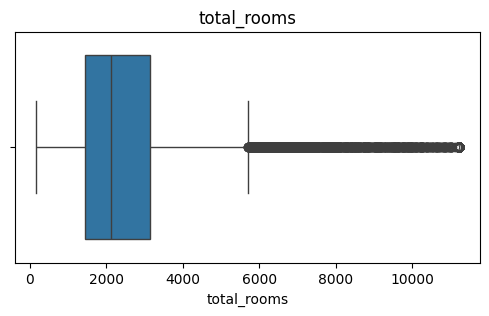

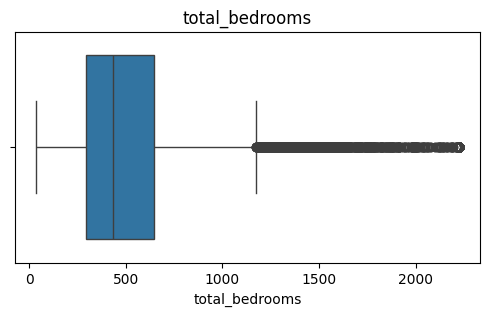

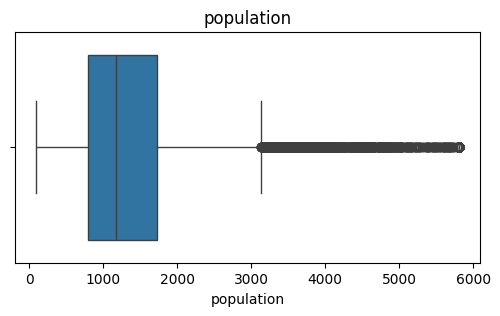

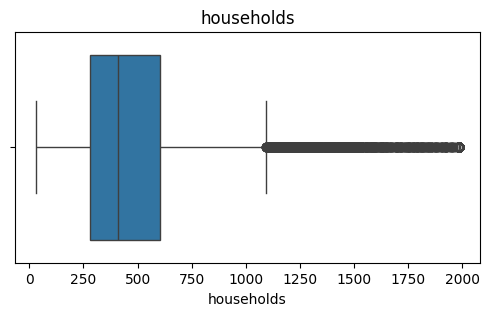

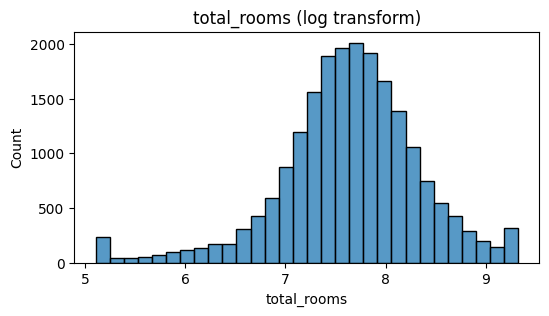

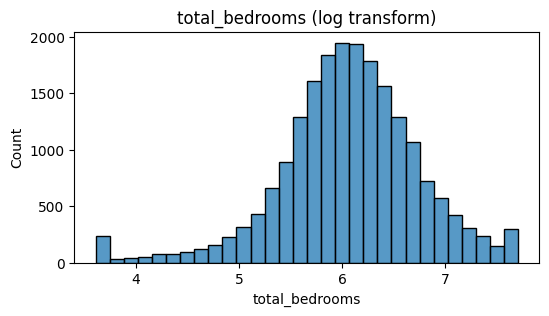

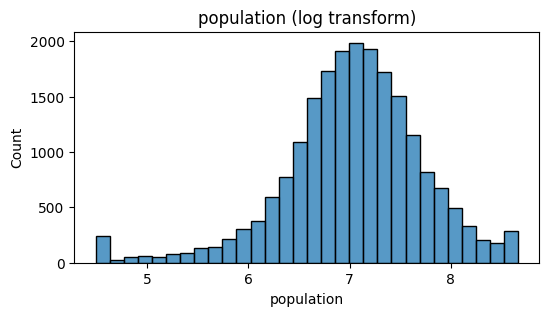

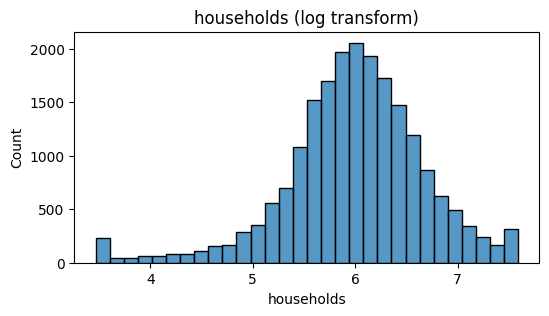

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

cols = ["total_rooms", "total_bedrooms", "population", "households"]

for col in cols:
    plt.figure(figsize=(6,3))
    sns.boxplot(x=df[col])
    plt.title(col)
    plt.show()

# o también mirar distribuciones logarítmicas
for col in cols:
    plt.figure(figsize=(6,3))
    sns.histplot(np.log1p(df[col]), bins=30)
    plt.title(f"{col} (log transform)")
    plt.show()


In [10]:
# Listar columnas del dataframe

df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'median_house_value'],
      dtype='object')

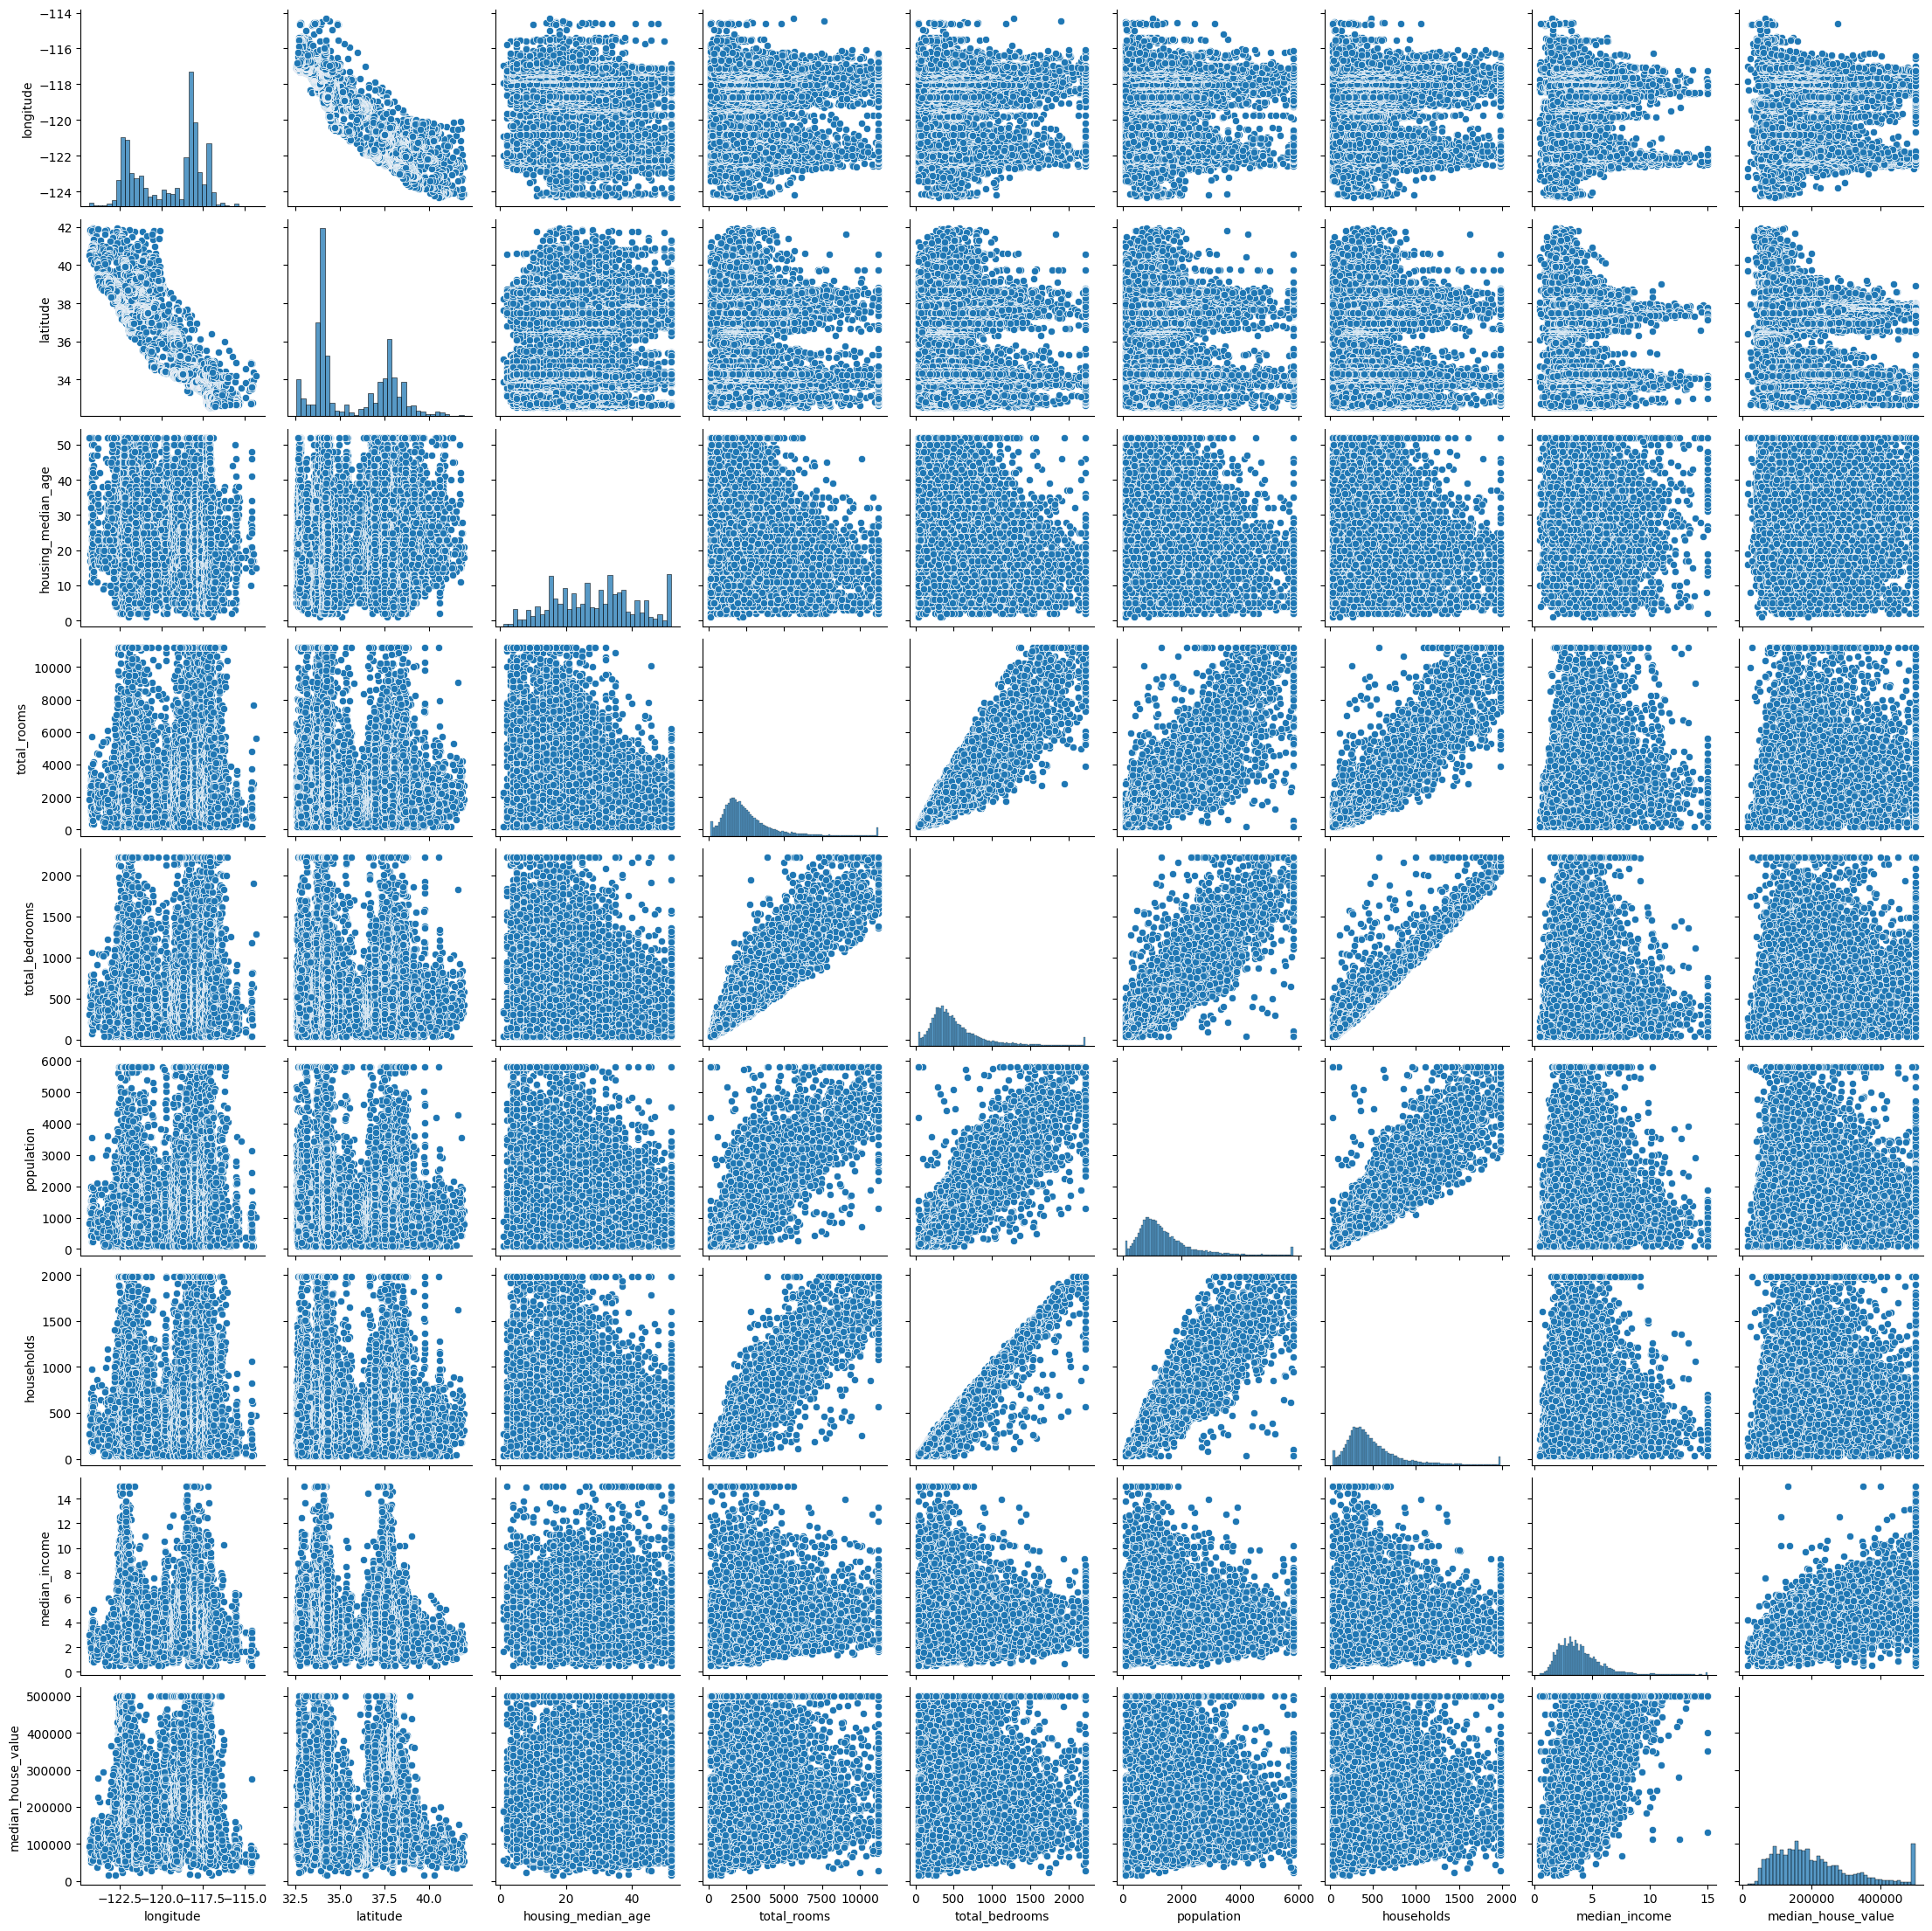

In [11]:
#Mostrar gráficamente relaciones entre columnas numéricas
sns.pairplot(df)


Antes de entrenar un modelo, es importante visualizar la distribución de la variable objetivo.
El histograma y la curva de densidad permiten identificar sesgos, valores extremos y rangos anómalos,
ayudando a decidir si conviene aplicar transformaciones previas.

<Axes: ylabel='Frequency'>

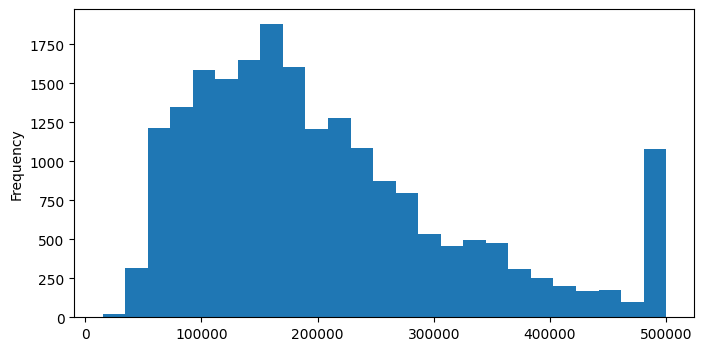

In [12]:
#Distribución de la variable objetivo 'median_house_value'
df['median_house_value'].plot.hist(bins=25,figsize=(8,4))

<Axes: ylabel='Density'>

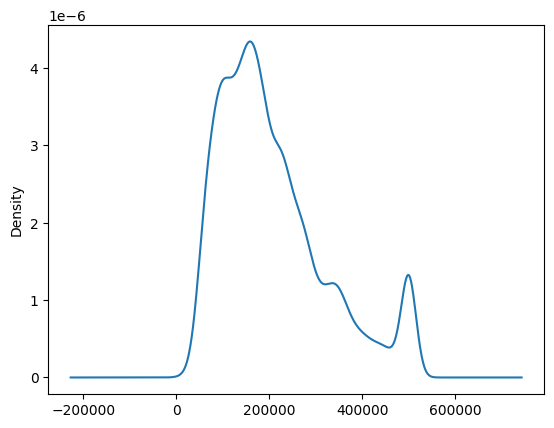

In [13]:
df['median_house_value'].plot.density()

La variable median_house_value no está normalmente distribuida.
Esto puede afectar al rendimiento de algunos modelos de regresión lineal.

Dado el sesgo positivo, conviene considerar una transformación logarítmica para mejorar la linealidad

````
y_log = np.log1p(df["median_house_value"])
````


In [14]:
# df.corr()
df.corr(numeric_only=True)["median_house_value"].sort_values(ascending=False)


median_house_value    1.000000
median_income         0.688075
total_rooms           0.149671
housing_median_age    0.105623
households            0.070798
total_bedrooms        0.053490
population           -0.028889
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

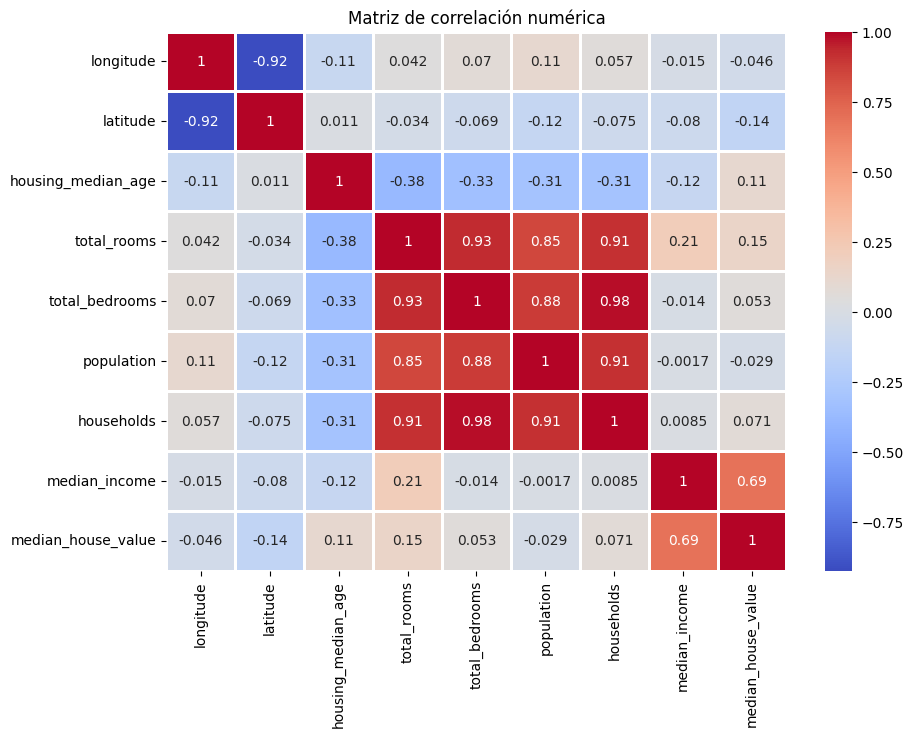

In [15]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(numeric_only=True), annot=True, linewidths=2, cmap='coolwarm')
plt.title("Matriz de correlación numérica")
plt.show()

La variable más relacionada con el valor de la vivienda es claramente ``median_income``.
Por tanto, si fueramos a hacer una regresión simple, la elección natural es:

```python
X = df[["median_income"]]
y = df["median_house_value"]
```

## 3. Preprocessing

El **preprocesamiento** consiste en preparar el dataset para que el modelo pueda trabajar con él de forma eficiente.  
Incluye la **gestión de valores nulos**, el **tratamiento de variables categóricas**, la **creación de nuevas variables útiles**  
y, en algunos casos, la **normalización o estandarización** de los datos.

### Valores Nulos o Nan

Tenemos varias estrategias de acción ante posibles valores nulos o NaN

- (1) Eliminarlos del conjunto de datos
- (2) Rellenar esos valores con el valor medio del resto de valores de la columna (distribuciones normales)
- (3) Rellenar esos valores con la mediana del resto de valores de la columna (es muy sesgada la distribución)
- (4) Rellenar esos valores con el valor más común en la columna (moda) (para variables categóricas o números enteros)
- (5) Otra estrategia en función del conocimiento del negocio, bbdd, etc.

Vamos a visualizar como están los datos de la columna

<Axes: >

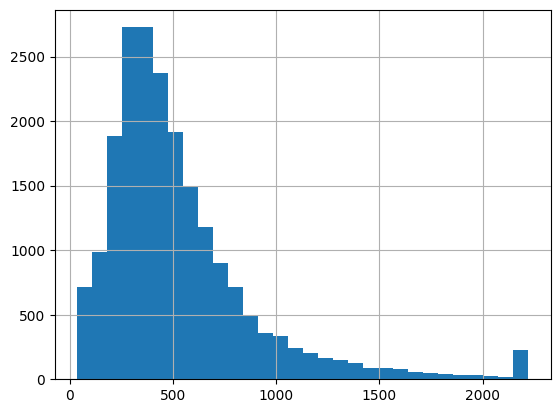

In [16]:
# Comprobamos la distribución
df["total_bedrooms"].hist(bins=30)

Optamos por la estragia 3 al ser muy sesgada la distribución

In [17]:
df["total_bedrooms"] = df["total_bedrooms"].fillna(df["total_bedrooms"].median())
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
dtype: int64



### Tratamiento de variables categóricas


Las variables categóricas contienen texto (por ejemplo, “INLAND”, “NEAR BAY”, “ISLAND”), y **los modelos de regresión no pueden trabajar directamente con texto**, solo con números.

Por eso debemos **convertirlas a valores numéricos**, pero **sin alterar su significado**.

La forma correcta es usar **One-Hot Encoding**, que convierte cada categoría en una columna binaria (0 o 1).

Ejemplo:

| ocean_proximity | ocean_proximity_INLAND | ocean_proximity_NEAR BAY | ocean_proximity_NEAR OCEAN | ocean_proximity_ISLAND |
| --------------- | ---------------------- | ------------------------ | -------------------------- | ---------------------- |
| INLAND          | 1                      | 0                        | 0                          | 0                      |
| NEAR BAY        | 0                      | 1                        | 0                          | 0                      |
| NEAR OCEAN      | 0                      | 0                        | 1                          | 0                      |

Cada fila tiene un 1 solo en la columna que representa su categoría.



#### Cómo hacerlo en pandas

Usamos `pd.get_dummies()` para generar las columnas automáticamente.

* `columns=["nombre_columna"]`: indica qué variable codificar.
* `drop_first=True`: elimina una de las categorías para evitar multicolinealidad en regresión lineal (sirve como “categoría base”).


In [18]:
# Verificamos los valores únicos antes de codificar
print("Valores únicos en ocean_proximity:")
print(df["ocean_proximity"].unique())

# Aplicar One-Hot Encoding
df = pd.get_dummies(df, columns=["ocean_proximity"], drop_first=True)

# Mostrar columnas nuevas
print("\nColumnas tras codificación:")
print(df.columns)

# Vista previa
df.head()

Valores únicos en ocean_proximity:
['NEAR BAY' '<1H OCEAN' 'INLAND' 'NEAR OCEAN' 'ISLAND']

Columnas tras codificación:
Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'],
      dtype='object')


longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                  41        880.0           129.0   
1    -122.22     37.86                  21       7099.0          1106.0   
2    -122.24     37.85                  52       1467.0           190.0   
3    -122.25     37.85                  52       1274.0           235.0   
4    -122.25     37.85                  52       1627.0           280.0   

   population  households  median_income  median_house_value  \
0       322.0       126.0         8.3252              452600   
1      2401.0      1138.0         8.3014              358500   
2       496.0       177.0         7.2574              352100   
3       558.0       219.0         5.6431              341300   
4       565.0       259.0         3.8462              342200   

   ocean_proximity_INLAND  ocean_proximity_ISLAND  ocean_proximity_NEAR BAY  \
0                   False                   False                      True   
1                   False                   False                      True   
2                   False                   False                      True   
3                   False                   False                      True   
4                   False                   False                      True   

   ocean_proximity_NEAR OCEAN  
0                       False  
1                       False  
2                       False  
3                       False  
4                       False

### Creación de variables derivadas

Podemos crear nuevas variables que aporten más información al modelo,
reduciendo el efecto de los outliers y representando relaciones más significativas.

In [19]:
df["rooms_per_household"] = df["total_rooms"] / df["households"]
df["bedrooms_per_room"] = df["total_bedrooms"] / df["total_rooms"]
df["population_per_household"] = df["population"] / df["households"]

# Comprobamos las nuevas columnas
df[["rooms_per_household", "bedrooms_per_room", "population_per_household"]].head()


rooms_per_household  bedrooms_per_room  population_per_household
0             6.984127           0.146591                  2.555556
1             6.238137           0.155797                  2.109842
2             8.288136           0.129516                  2.802260
3             5.817352           0.184458                  2.547945
4             6.281853           0.172096                  2.181467

Estas nuevas variables representan relaciones más estables que los valores absolutos.
Por ejemplo:

- ``rooms_per_household``: promedio de habitaciones por hogar.

- ``bedrooms_per_room``: proporción de dormitorios respecto al total de habitaciones.

- ``population_per_household``: tamaño medio de los hogares.

In [20]:
df.corr(numeric_only=True)["median_house_value"].sort_values(ascending=False)



median_house_value            1.000000
median_income                 0.688075
rooms_per_household           0.174920
ocean_proximity_NEAR BAY      0.160284
total_rooms                   0.149671
ocean_proximity_NEAR OCEAN    0.141862
housing_median_age            0.105623
households                    0.070798
total_bedrooms                0.053241
ocean_proximity_ISLAND        0.023416
population                   -0.028889
longitude                    -0.045967
population_per_household     -0.078069
latitude                     -0.144160
bedrooms_per_room            -0.236492
ocean_proximity_INLAND       -0.484859
Name: median_house_value, dtype: float64

In [21]:
# Seleccionar variables relevantes basadas en correlación
corr = df.corr(numeric_only=True)["median_house_value"]
variables_relevantes = corr[abs(corr) > 0.1].index.tolist()
variables_relevantes.remove("median_house_value")


## 4. División del dataset

Antes de entrenar el modelo, debemos **dividir el dataset** en dos partes:

- **Conjunto de entrenamiento (train)** → se utiliza para **ajustar o entrenar el modelo**.  
- **Conjunto de prueba (test)** → se utiliza para **evaluar el rendimiento del modelo** con datos que no ha visto.

Esta división es esencial para comprobar si el modelo **generaliza correctamente** o si está **sobreajustado** (memoriza en lugar de aprender).

Ponemos todas las características numéricas en X y el precio(median_house_value) en y.

In [22]:
# Separar la variable objetivo por nombre
y = df["median_house_value"]

X = df.drop(columns=["median_house_value"])

# Solo las variables relevantes
# X = df[variables_relevantes]

print("Feature set shape:", X.shape)
print("Target shape:", y.shape)



Feature set shape: (20640, 15)
Target shape: (20640,)


Dividimos el dataset en 4 grupos:

In [23]:
from sklearn.model_selection import train_test_split

# Dividir el dataset en conjuntos de entrenamiento y prueba
# X → variables independientes (características)
# y → variable dependiente (valor que queremos predecir)
# test_size=0.2 → reserva el 20% de los datos para el conjunto de prueba
# random_state=0 → fija una semilla aleatoria para obtener siempre la misma división (reproducibilidad)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Verificamos las divisiones train/test (deben estar en la proporción según el parámetro test_size anterior)

In [24]:
print("Training feature set size:",X_train.shape)
print("Test feature set size:",X_test.shape)
print("Training variable set size:",y_train.shape)
print("Test variable set size:",y_test.shape)

Training feature set size: (16512, 15)
Test feature set size: (4128, 15)
Training variable set size: (16512,)
Test variable set size: (4128,)


## 5. Estandarización de los datos

La **estandarización** (o normalización tipo *z-score*) es una parte esencial del **preprocesamiento** de los datos.  
Su objetivo es que todas las variables predictoras (`X`) tengan una **escala comparable**,  
ya que algunas (como *total_rooms* o *population*) tienen valores miles de veces mayores que otras (como *median_income* o *housing_median_age*).

Esto mejora la **estabilidad numérica** del modelo y evita que una variable con valores grandes domine sobre el resto.

En la regresión lineal, **solo se escalan las variables independientes (X)**,  
mientras que la variable dependiente (`y`) se mantiene en sus unidades originales  
(por ejemplo, dólares en el caso de `median_house_value`).


In [25]:
from sklearn.preprocessing import StandardScaler

# Crear el objeto escalador
scaler = StandardScaler()

# Ajustar el escalador con los datos de entrenamiento y transformar ambos conjuntos
# Se usa fit_transform() sobre X_train para calcular media y desviación
# y transform() sobre X_test para aplicar la misma escala
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# No se escalan las variables objetivo (y_train, y_test)
# En regresión lineal deben conservar sus unidades originales

## 6. Creación del modelo Linear Regression Multivariable

Una **regresión lineal multivariable** utiliza **más de una variable independiente (X)**  
para predecir una única variable dependiente (`y`).  
En este caso, queremos estimar el **valor medio de la vivienda (`median_house_value`)**  
utilizando todas las variables numéricas y derivadas del dataset.

El modelo busca el **hiperplano** que mejor se ajusta a los datos minimizando el **error cuadrático medio (MSE)**.

In [26]:
from sklearn.linear_model import LinearRegression

# Crear el objeto del modelo
modelo = LinearRegression()

## 7. Entrenamiento

Una vez creado el modelo de regresión lineal, llega el momento de **entrenarlo** con los datos de entrenamiento (`X_train`, `y_train`).  
Durante el entrenamiento, el modelo aprende los **coeficientes (pesos)** que mejor ajustan la relación entre las variables independientes (características) y la variable dependiente (el valor medio de la vivienda).

In [27]:
# Entrenar el modelo con los datos de entrenamiento
modelo.fit(X_train_scaled, y_train)

LinearRegression()


**Intersección** (``intercept_``):
Es el valor estimado de la variable objetivo cuando todas las variables independientes son 0.

In [28]:


print("\nIntersección (bias):")
print(modelo.intercept_)


Intersección (bias):
207194.69373788772


**Coeficientes** (``coef_``):
Indican cuánto cambia la variable objetivo (y) cuando cada variable independiente (X) aumenta una unidad,
manteniendo las demás constantes.

Si un coeficiente es positivo, el valor de la vivienda aumenta con esa variable.

Si es negativo, el valor disminuye al aumentar esa variable.

In [29]:
# Mostrar los coeficientes aprendidos y el término independiente (bias)
print("Coeficientes (pendientes):")
print(modelo.coef_)

Coeficientes (pendientes):
[-57446.52707298 -58518.66209128  14114.0564947    8240.34699233
  -1120.35940066 -55538.16055594  53714.70744305  78048.10853493
 -15974.14504183   1970.16699894  -2378.26193009    370.68301377
   8512.13216599  17804.62218629   2412.68882705]


### Coeficientes del modelo

¿Para qué sirve mostrar los coeficientes del modelo?

Después de entrenar una **regresión lineal**, el modelo calcula un conjunto de **coeficientes**:  
uno por cada variable de entrada.  
Estos coeficientes nos dicen **cuánto influye cada variable** en la predicción del valor final.

Para verlo de forma clara, se guardan en un **DataFrame de pandas**, junto con el nombre de cada variable.  
Así podemos identificar fácilmente:

- 🔼 **Variables con coeficiente positivo** → hacen que el valor de la vivienda aumente.  
- 🔽 **Variables con coeficiente negativo** → hacen que el valor de la vivienda disminuya.  
- 📏 **Magnitud del coeficiente** → indica la importancia relativa (cuanto más grande, más influencia).

En resumen, esta tabla nos ayuda a **interpretar el modelo**,  
entendiendo qué factores tienen más peso en el precio de las viviendas y en qué dirección afectan.

In [30]:


# Convertimos a DataFrame con las columnas originales
X_train_original = pd.DataFrame(X_train_scaled, columns=X.columns)

# Ahora sí, creamos el DataFrame de coeficientes
coef_df = pd.DataFrame(
    data=modelo.coef_.ravel(),
    index=X_train_original.columns,
    columns=["Coeficiente"]
)
coef_df


Coeficiente
longitude                  -57446.527073
latitude                   -58518.662091
housing_median_age          14114.056495
total_rooms                  8240.346992
total_bedrooms              -1120.359401
population                 -55538.160556
households                  53714.707443
median_income               78048.108535
ocean_proximity_INLAND     -15974.145042
ocean_proximity_ISLAND       1970.166999
ocean_proximity_NEAR BAY    -2378.261930
ocean_proximity_NEAR OCEAN    370.683014
rooms_per_household          8512.132166
bedrooms_per_room           17804.622186
population_per_household     2412.688827

## 8. Predicción

Una vez entrenado el modelo de regresión lineal, el siguiente paso es **realizar predicciones**.  
Esto significa utilizar el modelo para **estimar el valor de la variable objetivo (`y`)**  
a partir de nuevas observaciones o de los datos del conjunto de prueba (`X_test`).

In [31]:
# Realizar predicciones con el conjunto de prueba
y_pred = modelo.predict(X_test_scaled)

# Mostrar los primeros resultados
print("Predicciones (primeras 10):")
print(y_pred[:10])

print("\nValores reales (primeras 10):")
print(y_test[:10].values)

Predicciones (primeras 10):
[ 57426.75187219 125568.37234941 290925.97902182 260997.52561024
 259426.84864821 156294.10701374 309657.79488794 242177.41986968
 264466.70130107 410337.09306407]

Valores reales (primeras 10):
[ 47700  45800 500001 218600 278000 158700 198200 157500 340000 446600]


Si los puntos se alinean cerca de la línea roja, significa que el modelo predice con buena precisión.
Cuanto más se alejen, mayor será el error.

In [32]:
# 1️ Crear una nueva casa con todas las variables en el mismo orden
nueva_casa = {
    "longitude": -118.5,
    "latitude": 34.2,
    "housing_median_age": 25.0,
    "total_rooms": 3000,
    "total_bedrooms": 500,
    "population": 1000,
    "households": 400,
    "median_income": 4.5,
    "ocean_proximity_INLAND": 1,   # zona interior
    "ocean_proximity_ISLAND": 0,
    "ocean_proximity_NEAR BAY": 0,
    "ocean_proximity_NEAR OCEAN": 0,
    "rooms_per_household": 7.5,
    "bedrooms_per_room": 0.16,
    "population_per_household": 2.5
}

# 2️ Convertir a DataFrame
import pandas as pd
nueva_casa_df = pd.DataFrame([nueva_casa])

# 3️ Asegurar orden correcto de columnas
nueva_casa_df = nueva_casa_df[X.columns]

# 4️ Escalar con el mismo StandardScaler usado en el entrenamiento
nueva_casa_scaled = scaler.transform(nueva_casa_df)

# 5️ Realizar la predicción
prediccion = modelo.predict(nueva_casa_scaled)

print(f"Valor estimado de la vivienda: ${prediccion[0]:,.2f}")



Valor estimado de la vivienda: $215,743.65


## 9. Cálculo de errores

Una vez realizadas las predicciones, necesitamos **medir qué tan bien ha funcionado el modelo**.  
Para ello se utilizan **métricas de error**, que comparan los valores predichos (`y_pred`) con los valores reales (`y_test`).

---

###  Principales métricas

| Métrica | Significado | Interpretación |
|----------|--------------|----------------|
| **MAE (Mean Absolute Error)** | Error medio absoluto | Promedio de las diferencias en valor absoluto entre las predicciones y los valores reales. Cuanto más pequeño, mejor. |
| **MSE (Mean Squared Error)** | Error cuadrático medio | Penaliza más los errores grandes. Se usa para calcular el RMSE. |
| **RMSE (Root Mean Squared Error)** | Raíz del error cuadrático medio | Indica el error medio en las mismas unidades que la variable objetivo (por ejemplo, dólares). |
| **R² (Coeficiente de determinación)** | Grado de ajuste del modelo | Mide qué porcentaje de la variabilidad de los datos explica el modelo. Cuanto más cerca de 1, mejor. |

---

In [33]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np


# Calcular los errores
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Mostrar resultados
print(f"Error absoluto medio (MAE): {mae:,.2f}")
print(f"Error cuadrático medio (MSE): {mse:,.2f}")
print(f"Raíz del error cuadrático medio (RMSE): {rmse:,.2f}")
print(f"Coeficiente de determinación (R²): {r2:.4f}")

Error absoluto medio (MAE): 50,662.11
Error cuadrático medio (MSE): 5,171,821,052.78
Raíz del error cuadrático medio (RMSE): 71,915.37
Coeficiente de determinación (R²): 0.6053


Interpretación de resultados

- MAE bajo → el modelo comete pocos errores en promedio.

- RMSE bajo → las predicciones son precisas (aunque penaliza más los errores grandes).

- R² cercano a 1 → el modelo explica gran parte de la variabilidad de los precios.

- R² cercano a 0 o negativo → el modelo no predice bien (se comporta casi como una media).

Podemos graficar la distribución del error para ver si el modelo tiende a sobreestimar o subestimar los valores.

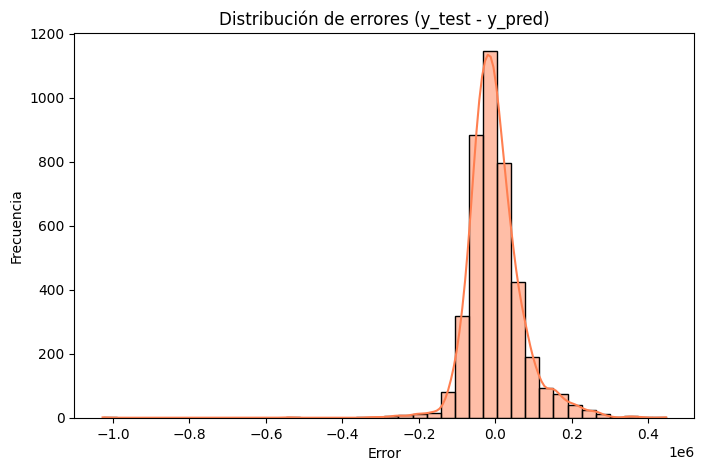

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular los errores individuales
errores = y_test - y_pred

plt.figure(figsize=(8,5))
sns.histplot(errores, bins=40, kde=True, color='coral')
plt.title("Distribución de errores (y_test - y_pred)")
plt.xlabel("Error")
plt.ylabel("Frecuencia")
plt.show()


Un modelo bien ajustado debería tener una distribución de errores centrada en 0 y simétrica,
sin sesgos claros hacia valores positivos (subestimación) o negativos (sobreestimación)

## 10. Gráfico de puntos del precio predicho y el y_test

Una de las formas más intuitivas de comprobar el rendimiento del modelo de regresión lineal  
es **comparar visualmente los valores reales** (`y_test`) con los **valores predichos** (`y_pred`).

Si el modelo realiza buenas predicciones, los puntos deberían situarse **cerca de una línea diagonal**  
que representa la igualdad entre valor real y predicho.

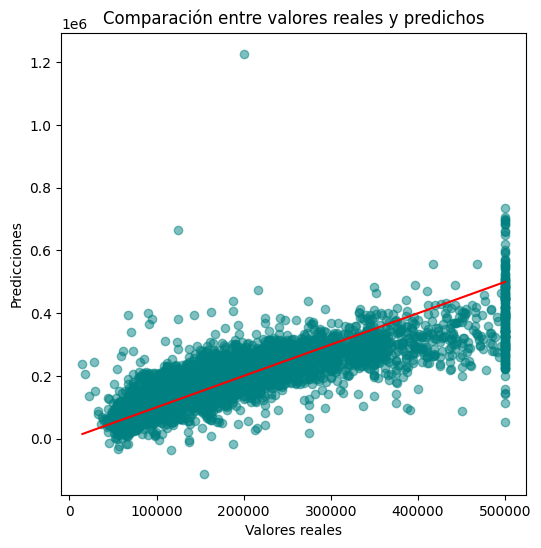

In [35]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.5, color='teal')
plt.xlabel("Valores reales")
plt.ylabel("Predicciones")
plt.title("Comparación entre valores reales y predichos")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')
plt.show()


## 11. Regresión Lineal Simple

En esta sección realizamos una **regresión lineal simple (univariable)** usando únicamente la variable  
**`median_income`** (ingreso medio de cada zona) para predecir el **valor medio de la vivienda** (`median_house_value`).

Esta es la variable con **mayor correlación** con el precio de la vivienda, por lo que se espera un buen ajuste lineal.

### 1. Preparación de los datos

Seleccionamos la variable independiente (`X`) y la variable dependiente (`y`),  
y dividimos los datos en conjuntos de entrenamiento y prueba.

In [36]:
from sklearn.model_selection import train_test_split

# Variable independiente (2D) y dependiente (1D)
X = df[["median_income"]].values
y = df["median_house_value"].values

# División del dataset: 80% entrenamiento, 20% prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 2. Entrenamiento del modelo

Creamos el modelo de regresión lineal y lo entrenamos con los datos de entrenamiento.

In [37]:
from sklearn.linear_model import LinearRegression

# Crear el modelo
modelo = LinearRegression()

# Entrenar el modelo
modelo.fit(X_train, y_train)

# Mostrar el coeficiente y la intersección
print(f"Coeficiente (pendiente): {modelo.coef_[0]:.2f}")
print(f"Intersección (ordenada en el origen): {modelo.intercept_:.2f}")


Coeficiente (pendiente): 41933.85
Intersección (ordenada en el origen): 44459.73


### 3. Visualización del ajuste

Representamos los datos de entrenamiento junto con la recta de regresión aprendida por el modelo.

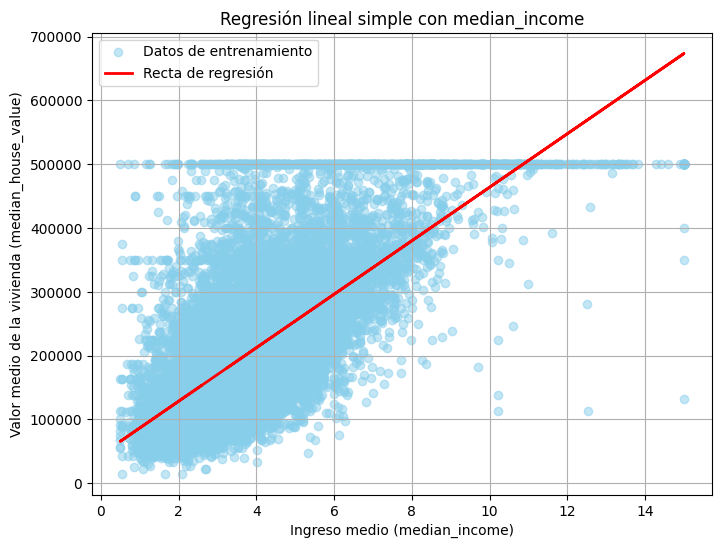

In [38]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(X_train, y_train, color='skyblue', alpha=0.5, label="Datos de entrenamiento")
plt.plot(X_train, modelo.predict(X_train), color='red', linewidth=2, label="Recta de regresión")
plt.xlabel("Ingreso medio (median_income)")
plt.ylabel("Valor medio de la vivienda (median_house_value)")
plt.title("Regresión lineal simple con median_income")
plt.legend()
plt.grid(True)
plt.show()


### 4. Evaluación del modelo

Calculamos las métricas de error más comunes: R² y RMSE.

In [39]:
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Predicciones
y_pred = modelo.predict(X_test)

# Métricas
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Coeficiente de determinación (R²): {r2:.4f}")
print(f"Raíz del error cuadrático medio (RMSE): {rmse:,.2f}")


Coeficiente de determinación (R²): 0.4589
Raíz del error cuadrático medio (RMSE): 84,209.01


El valor de **R² = 0.46** indica que el ingreso medio (median_income)
es un buen predictor, pero no suficiente por sí solo para explicar el precio.
→ Explica casi la mitad de la variación, lo cual es razonable con una sola variable.

El **RMSE () 84 000 \$** refleja que las predicciones tienen un error medio moderado.
Dado que los precios típicos del dataset oscilan entre 100 000 \$  y 500 000 \$,
un error de ~80 000 \$ supone entre un 15 % y un 20 % del valor medio:
aceptable, pero mejorable añadiendo más variables.

In [40]:
# 1️ Crear un nuevo valor de ingreso medio
nuevo_ingreso = np.array([[4.5]])  # tiene que ser un array 2D

# 2️ Hacer la predicción con el modelo entrenado
prediccion = modelo.predict(nuevo_ingreso)

# 3️ Mostrar resultado
print(f"Para median_income = 4.5, el valor estimado de la vivienda es: ${prediccion[0]:,.2f}")


Para median_income = 4.5, el valor estimado de la vivienda es: $233,162.05


### 5. Interpretación de resultados

El modelo aprende una relación lineal positiva:
a medida que aumenta el ingreso medio (median_income), también aumenta el precio medio de la vivienda.

El coeficiente (pendiente) indica cuánto sube el precio por cada unidad de aumento del ingreso medio.

Un R² cercano a 0.6–0.7 significa que el ingreso medio explica buena parte de la variación del precio,
aunque no toda (hay otros factores como localización o edad de la vivienda).

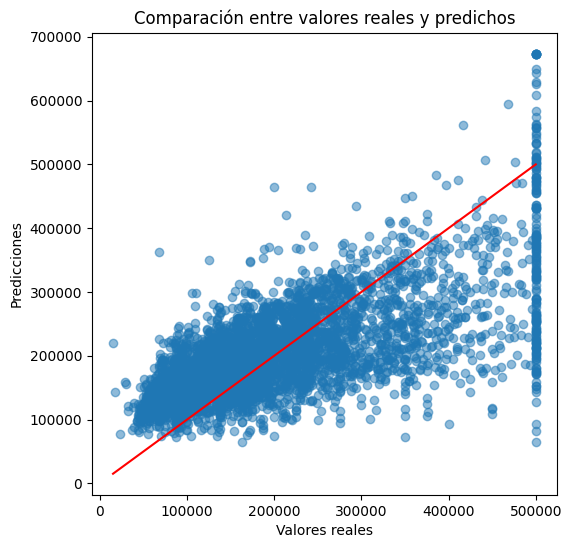

In [41]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Valores reales")
plt.ylabel("Predicciones")
plt.title("Comparación entre valores reales y predichos")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')
plt.show()


### *Ejercicio: Alturas*

Con el dataset heights.csv (altura de padres e hijos):

1. Crea un dataframe de pandas con la información del dataset.

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("data/SOCR-HeightWeight.csv")
df.head()

Index  Height(Inches)  Weight(Pounds)
0      1        65.78331        112.9925
1      2        71.51521        136.4873
2      3        69.39874        153.0269
3      4        68.21660        142.3354
4      5        67.78781        144.2971

2. Muestra la información del dataset y un gráfico que relacione ambos datos.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Index           25000 non-null  int64  
 1   Height(Inches)  25000 non-null  float64
 2   Weight(Pounds)  25000 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 586.1 KB


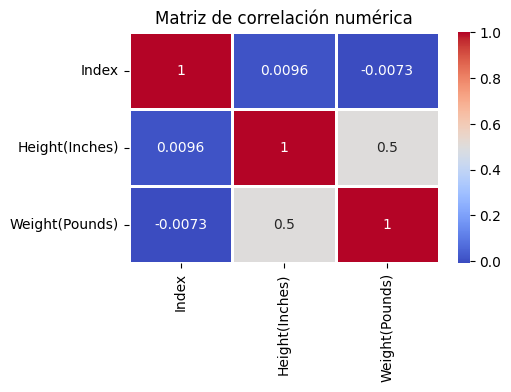

In [43]:
df.info()
plt.figure(figsize=(5,3))
sns.heatmap(df.corr(numeric_only=True), annot=True, linewidths=2, cmap='coolwarm')
plt.title("Matriz de correlación numérica")
plt.show()

¿La correlación entre altura y peso es positiva o negativa?

¿Qué implica eso sobre su relación?

La correlación entre altura y peso es positiva
Eso implica que tienen

3. Haz una preparación de los datos

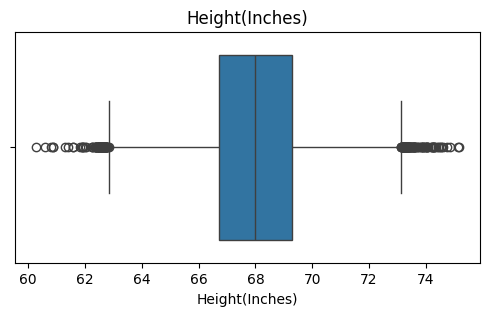

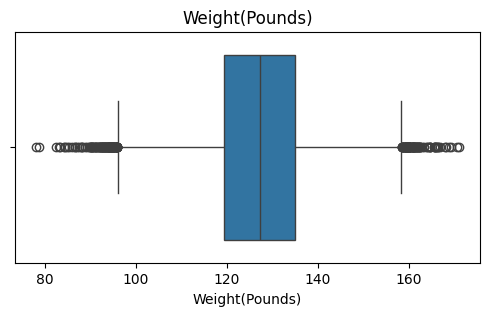

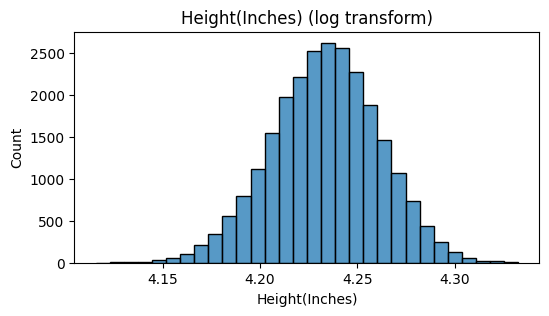

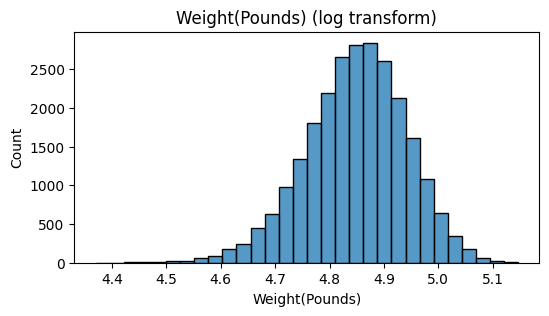

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

cols = ["Height(Inches)","Weight(Pounds)"]

for col in cols:
    plt.figure(figsize=(6,3))
    sns.boxplot(x=df[col])
    plt.title(col)
    plt.show()

# o también mirar distribuciones logarítmicas
for col in cols:
    plt.figure(figsize=(6,3))
    sns.histplot(np.log1p(df[col]), bins=30)
    plt.title(f"{col} (log transform)")
    plt.show()

In [45]:
for col in ["Height(Inches)", "Weight(Pounds)"]:
    q_low = df[col].quantile(0.01)
    q_high = df[col].quantile(0.99)
    df[col] = df[col].clip(q_low, q_high)

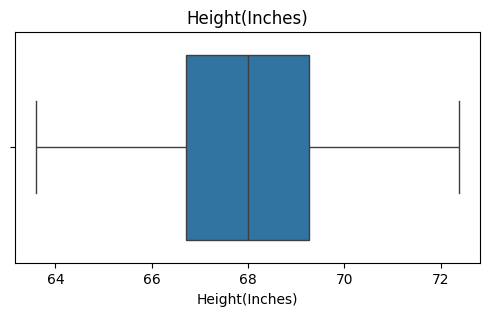

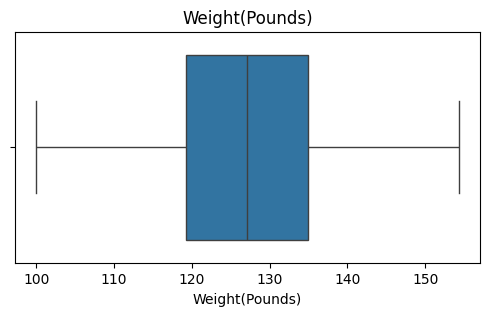

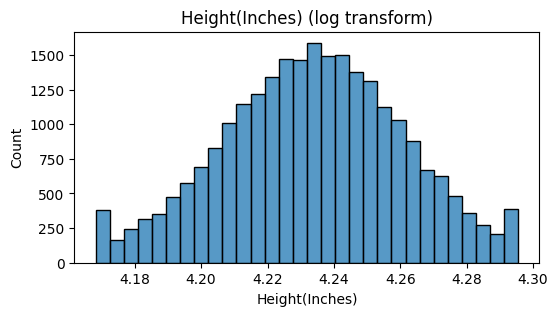

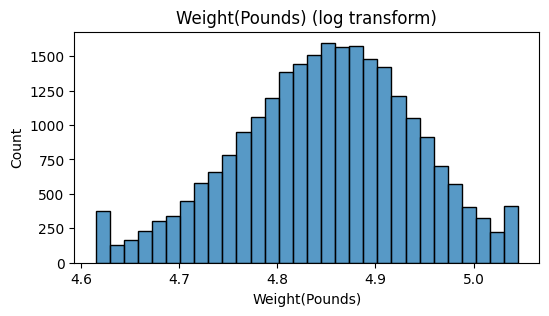

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

cols = ["Height(Inches)","Weight(Pounds)"]

for col in cols:
    plt.figure(figsize=(6,3))
    sns.boxplot(x=df[col])
    plt.title(col)
    plt.show()

# o también mirar distribuciones logarítmicas
for col in cols:
    plt.figure(figsize=(6,3))
    sns.histplot(np.log1p(df[col]), bins=30)
    plt.title(f"{col} (log transform)")
    plt.show()

4. Separa el dataframe en 4 grupos: X_train (característica de entrenamiento: altura de los padres), X_test (característica de test, 30% de las filas), y_train(etiqueta de entrenamiento: altura de los hijos), y_test(etiqueta de test).

In [47]:
y = df["Height(Inches)"]
X = df[["Weight(Pounds)"]]


5. Muestra el número de registros de cada grupo (entrenamiento y test)

In [48]:
print("Feature set shape:", X.shape)
print("Target shape:", y.shape)

Feature set shape: (25000, 1)
Target shape: (25000,)


6. Entrena un modelo de regresión lineal con sklearn y muestra los coeficientes (constante y pendiente).

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training feature set size:",X_train.shape)
print("Test feature set size:",X_test.shape)
print("Training variable set size:",y_train.shape)
print("Test variable set size:",y_test.shape)

Training feature set size: (20000, 1)
Test feature set size: (5000, 1)
Training variable set size: (20000,)
Test variable set size: (5000,)


In [50]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Ajustar el escalador con los datos de entrenamiento y transformar ambos conjuntos
# Se usa fit_transform() sobre X_train para calcular media y desviación
# y transform() sobre X_test para aplicar la misma escala
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

from sklearn.linear_model import LinearRegression

# Crear el objeto del modelo
modelo = LinearRegression()
modelo.fit(X_train_scaled, y_train)


LinearRegression()

In [51]:
# Mostrar los coeficientes aprendidos y el término independiente (bias)
print("Coeficientes (pendientes):")
print(modelo.coef_)

Coeficientes (pendientes):
[0.93135182]


In [52]:
# Convertimos a DataFrame con las columnas originales
X_train_original = pd.DataFrame(X_train_scaled, columns=X.columns)

# Ahora sí, creamos el DataFrame de coeficientes
coef_df = pd.DataFrame(
    data=modelo.coef_.ravel(),
    index=X_train_original.columns,
    columns=["Coeficiente"]
)
coef_df


Coeficiente
Weight(Pounds)     0.931352

7. Muestra un gráfico con los puntos y la recta de regresión.

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


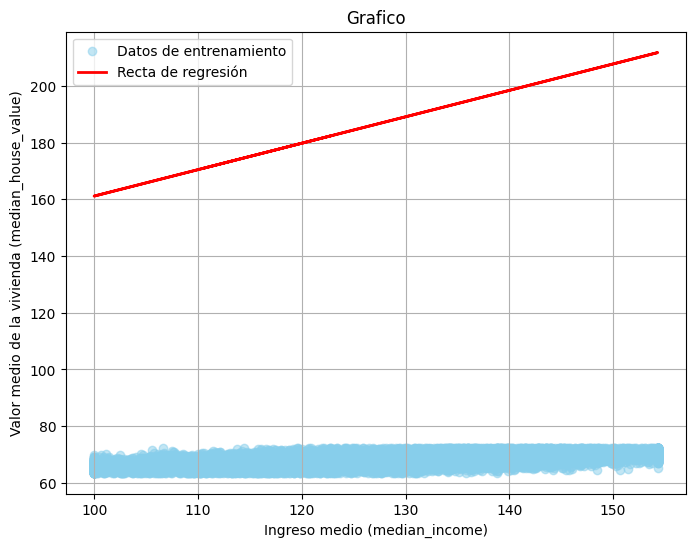

In [57]:
plt.figure(figsize=(8,6))
plt.scatter(X_train, y_train, color='skyblue', alpha=0.5, label="Datos de entrenamiento")
plt.plot(X_train, modelo.predict(X_train), color='red', linewidth=2, label="Recta de regresión")
plt.xlabel("Ingreso medio (median_income)")
plt.ylabel("Valor medio de la vivienda (median_house_value)")
plt.title("Grafico")
plt.legend()
plt.grid(True)
plt.show()

8. Evaluación del modelo, muestra las métricas de los datos de entrenamiento.

In [55]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Realizar predicciones con el conjunto de prueba (para el Ejercicio Alturas)
y_pred = modelo.predict(X_test_scaled)

# Calcular los errores
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Mostrar resultados
print(f"Error absoluto medio (MAE): {mae:,.2f}")
print(f"Error cuadrático medio (MSE): {mse:,.2f}")
print(f"Raíz del error cuadrático medio (RMSE): {rmse:,.2f}")
print(f"Coeficiente de determinación (R²): {r2:.4f}")

Error absoluto medio (MAE): 1.31
Error cuadrático medio (MSE): 2.64
Raíz del error cuadrático medio (RMSE): 1.63
Coeficiente de determinación (R²): 0.2565


¿Qué valor de R² has obtenido?

¿Qué nos dice ese valor sobre la fuerza de la relación entre altura y peso?

¿Podría mejorarse el modelo añadiendo más variables (por ejemplo, edad o sexo)?

- He obtenidoun valor muy bajo de 0.25
- Que no tiene mucha correlación
- Añadiendo más variables el modelo podría mejorarse mucho, entre más variables mejor

9. Calcula las predicciones de los datos de test y muestra los valores de las diferentes métricas.

In [56]:
# Realizar predicciones con el conjunto de prueba
y_pred = modelo.predict(X_test_scaled)

# Mostrar los primeros resultados
print("Predicciones (primeras 10):")
print(y_pred[:10])

print("\nValores reales (primeras 10):")
print(y_test[:10].values)

Predicciones (primeras 10):
[68.5766584  66.75883314 68.71524997 67.93278912 65.79892197 66.42627363
 67.75708993 68.45859167 68.24838305 69.05732258]

Valores reales (primeras 10):
[68.42447 67.89663 67.65922 69.01299 69.01055 67.66172 65.51245 67.9803
 70.14263 68.73614]


# Webgrafia


[Curso de Cesar Guirò](https://cesguiro.es/doku.php?id=clase:ia:saa:start)

[Curso de Luz Frías](https://github.com/koldLight/curso-python-analisis-datos)

[Curso de Tirtjakupto Sarkar](https://github.com/tirthajyoti/Machine-Learning-with-Python)

[DataCamp](https://www.datacamp.com/)


# Licencia

[Attributon-ShacerAlike 4.0 International](https://creativecommons.org/licenses/by-sa/4.0/)

Puedes utilizar libremente este material, con las siguientes condiciones:

* Atribuir la autoría a este documento.
* Si lo utilizas y haces cambios, deberás liberarlo también bajo la misma licencia.